In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import datetime
import geopandas as gpd
import numpy as np

In [58]:
data_dir = os.path.normpath(rf'C:/Users/mqalborn\Desktop\ET_3SEB')

lai_l0x_bls = pd.read_csv(os.path.join(data_dir, 'results/LAI_SATELLITE/LAI_L0X_MODIS_BLS_2025.csv')).drop('Unnamed: 0', axis=1)
lai_l0x_bls.loc[:, 'date'] = pd.to_datetime(lai_l0x_bls.id.str.split('_', expand=True)[5])
lai_l0x_bls = lai_l0x_bls[['block', 'date', 'id_vector', 'LAI', 'LAI_count']]
lai_l0x_bls = lai_l0x_bls[lai_l0x_bls.LAI_count > 0]
lai_l0x_bls = lai_l0x_bls.groupby(['date', 'block']).agg(LAI_sat=('LAI', 'mean')).reset_index()
lai_l0x_bls.loc[:, 'LAI_sat'] = lai_l0x_bls.LAI_sat / 100
lai_l0x_bls = lai_l0x_bls[-lai_l0x_bls.date.dt.date.isin([datetime.date(2024, 1, 9), datetime.date(2025, 4, 9)])]

con = lai_l0x_bls.block.str.contains('CC')
lai_l0x_bls.loc[con, 'treatment'] = 'CC'
con = lai_l0x_bls.block.str.contains('NC')
lai_l0x_bls.loc[con, 'treatment'] = 'NC'

lai_l0x_bls.rename(columns={'date': 'date_sat'}, inplace=True)
lai_l0x_bls
# df_date_l0x = lai_l0x_bls[['date']]
# df_date_l0x.loc[:, 'date_sat'] = df_date_l0x.date
# path = ''

,date_sat,block,LAI_sat,treatment
0,2024-01-01,CC1,0.375000,CC
1,2024-01-01,CC2,0.372500,CC
2,2024-01-01,CC3,0.348000,CC
3,2024-01-01,CC4,0.499545,CC
4,2024-01-01,CC5,0.369048,CC
...,...,...,...,...
563,2025-09-16,CC5,0.745238,CC
564,2025-09-16,NC1,0.800000,NC
565,2025-09-16,NC2,0.805000,NC
566,2025-09-16,NC3,0.806000,NC


<Axes: xlabel='date', ylabel='LAI_sat'>

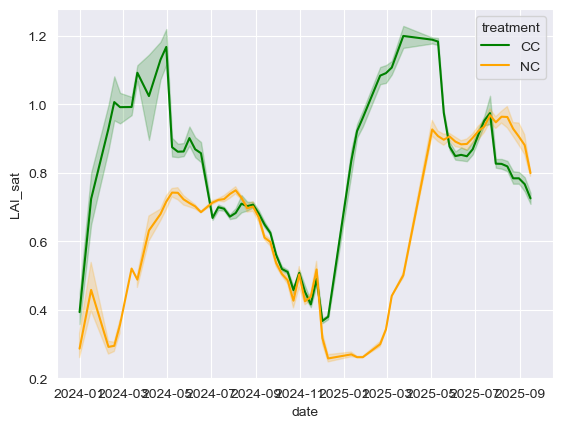

In [15]:
sns.set_palette(['green', 'orange'])
sns.lineplot(data=lai_l0x_bls, x='date', y='LAI_sat', hue='treatment')

In [81]:
data_lai2200 = pd.read_csv(rf'C:\Users\mqalborn\Desktop\ET_3SEB\LAI\BLS\LAI\2025\expanded/expanded.csv')
data_lai2200.timestamp = pd.to_datetime(data_lai2200.timestamp)
# df_date_lai2200 = data_lai2200[['timestamp']]
data_lai2200.rename(columns={'timestamp': 'date_lai2200'}, inplace=True)

In [82]:
df_date_lai2200 = data_lai2200[['date_lai2200']]
df_date_lai2200.loc[:, 'date'] = df_date_lai2200.date_lai2200
df_date_lai2200.sort_values(by=['date'], ascending=True, inplace=True)

df_date_l0x = lai_l0x_bls[['date_sat']]
df_date_l0x.loc[:, 'date'] = df_date_l0x.date_sat
df_date_l0x.sort_values(by=['date'], ascending=True, inplace=True)
#
df_date = pd.merge_asof(df_date_lai2200, df_date_l0x, on='date', direction='nearest')
df_date.drop('date', axis=1, inplace=True)

data_lai2200 = pd.merge(data_lai2200, df_date, on='date_lai2200', how='left')

C:\Users\mqalborn\AppData\Local\Temp\ipykernel_32312\477036301.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_lai2200.loc[:, 'date'] = df_date_lai2200.date_lai2200
C:\Users\mqalborn\AppData\Local\Temp\ipykernel_32312\477036301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_lai2200.sort_values(by=['date'], ascending=True, inplace=True)
C:\Users\mqalborn\AppData\Local\Temp\ipykernel_32312\477036301.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [83]:
data_lai2200

,id,date_lai2200,lat,lon,TransComp,Model,Records,ScattCorr,LAI,SMP,block,cover,B,date_sat
0,CC1AC210,2025-02-10 08:17:20,38.621442,-121.723046,a-p-s,Horizontal,1A 15B 16G,none,0.00,0,CC1,AC,0,2025-02-20
1,CC1AC210,2025-02-10 08:17:20,38.621442,-121.723046,a-p-s,Horizontal,1A 15B 16G,none,0.00,0,CC1,AC,0,2025-02-20
2,CC1AC227,2025-02-27 07:07:38,38.621457,-121.723056,a-p-s,Horizontal,3A 15B 18G,none,0.09,1,CC1,AC,0,2025-02-28
3,CC1AC319,2025-03-19 05:37:51,38.621471,-121.723057,a-p-s,Horizontal,3A 16B 19G,none,0.00,0,CC1,AC,0,2025-03-24
4,CC1AC402,2025-04-02 05:15:34,38.621483,-121.723051,a-p-s,Horizontal,3A 15B 18G,none,0.00,0,CC1,AC,0,2025-03-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184,CC5UC715.11,2025-07-15 06:10:50,38.620777,-121.723869,a-c-s,Horizontal,1A 1B,none,0.94,1,CC5,UC,31,2025-07-14
2185,CC5UC715.12,2025-07-15 06:10:54,38.620777,-121.723869,a-c-s,Horizontal,1A 1B,none,0.57,1,CC5,UC,32,2025-07-14
2186,CC5UC715.13,2025-07-15 06:10:57,38.620777,-121.723869,a-c-s,Horizontal,1A 1B,none,0.00,0,CC5,UC,33,2025-07-14
2187,CC5UC715.14,2025-07-15 06:11:00,38.620777,-121.723869,a-c-s,Horizontal,1A 1B,none,0.98,1,CC5,UC,34,2025-07-14


In [84]:
data_lai = pd.merge(data_lai2200, lai_l0x_bls, on=['date_sat', 'block'])
print(data_lai.columns)

data_lai.groupby(['date_lai2200', 'date_sat' ,'block', 'treatment']).agg(LAI=('LAI', 'mean'), LAI_sat=('LAI_sat', 'mean')).reset_index()

Index(['id', 'date_lai2200', 'lat', 'lon', 'TransComp', 'Model', 'Records',
       'ScattCorr', 'LAI', 'SMP', 'block', 'cover', 'B', 'date_sat', 'LAI_sat',
       'treatment'],
      dtype='object')


,date_lai2200,date_sat,block,treatment,LAI,LAI_sat
0,2025-01-16 07:21:10,2025-01-19,NC1,NC,0.00,0.26000
1,2025-01-16 07:21:16,2025-01-19,NC1,NC,0.00,0.26000
2,2025-01-16 07:21:21,2025-01-19,NC1,NC,0.00,0.26000
3,2025-01-16 07:21:26,2025-01-19,NC1,NC,0.00,0.26000
4,2025-01-16 07:21:30,2025-01-19,NC1,NC,0.00,0.26000
...,...,...,...,...,...,...
2080,2025-08-27 07:49:53,2025-08-31,CC5,CC,1.32,0.81381
2081,2025-08-27 07:49:57,2025-08-31,CC5,CC,0.00,0.81381
2082,2025-08-27 07:50:00,2025-08-31,CC5,CC,0.00,0.81381
2083,2025-08-27 07:50:05,2025-08-31,CC5,CC,0.41,0.81381


<Axes: xlabel='LAI_sat', ylabel='LAI'>

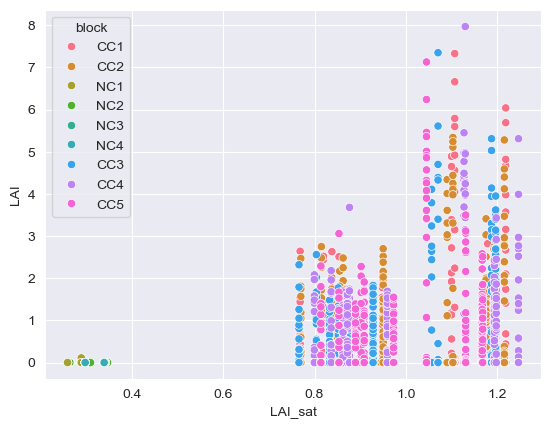

In [86]:
sns.scatterplot(data=data_lai, x='LAI_sat', y='LAI', hue='block')